In [ ]:
import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID"   # see issue #152
os.environ["CUDA_VISIBLE_DEVICES"] = "7"

In [1]:
import tensorflow as tf
import keras 

from keras.models import Model
from keras.layers import Flatten, Dense
from keras import layers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.applications import ResNet50

import matplotlib.pyplot as plt
from matplotlib import ticker
%matplotlib inline 

Using TensorFlow backend.


In [2]:
datagen = ImageDataGenerator(rescale=1./255, validation_split=0.2)

In [3]:
train_generator = datagen.flow_from_directory(
    directory='datasets/weight/',
    target_size=(1024,1024), 
    # classes=[0,1,2], 
    class_mode='binary', 
    batch_size=8, 
    shuffle=True,
    seed=42,
    subset='training'
    )

Found 7907 images belonging to 2 classes.


In [4]:
valid_generator = datagen.flow_from_directory(
    directory='datasets/weight/',
    target_size=(1024,1024), 
    # classes=[0,1,2], 
    class_mode='binary', 
    batch_size=8, 
    shuffle=True,
    seed=42,
    subset='validation'
    )

Found 1975 images belonging to 2 classes.


In [12]:
train_generator = datagen.flow_from_directory(
    directory='../data/UTK_THINNESS/',
    target_size=(200,200), 
    # classes=[0,1,2], 
    class_mode='binary', 
    batch_size=8, 
    shuffle=True,
    seed=42,
    subset='training'
    )

Found 2852 images belonging to 2 classes.


In [13]:
valid_generator = datagen.flow_from_directory(
    directory='../data/UTK_THINNESS/',
    target_size=(200,200), 
    # classes=[0,1,2], 
    class_mode='binary', 
    batch_size=8, 
    shuffle=True,
    seed=42,
    subset='validation'
    )

Found 712 images belonging to 2 classes.


In [2]:
base_model = keras.applications.vgg16.VGG16(include_top=False, weights='imagenet', input_shape=(1024,1024,3), pooling=None)

In [5]:
base_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 1024, 1024, 3)     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 1024, 1024, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 1024, 1024, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 512, 512, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 512, 512, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 512, 512, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 256, 256, 128)     0         
__________

In [8]:
base_model.layers[9].output

<tf.Tensor 'block3_conv3/Relu:0' shape=(?, 256, 256, 256) dtype=float32>

In [25]:
base_model = keras.applications.vgg19.VGG19(include_top=False, weights='imagenet', input_shape=(1024,1024,3), pooling=None)

In [9]:
base_model = keras.applications.inception_v3.InceptionV3(include_top=False, weights='imagenet', input_tensor=None, input_shape=(1024,1024,3), pooling=None)

In [11]:
x = base_model.output
# x = Flatten()(x)
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x)
predictions = Dense(1, activation='sigmoid')(x)

In [12]:
model = Model(inputs=base_model.input, outputs=predictions)
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 1024, 1024, 3 0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 511, 511, 32) 864         input_2[0][0]                    
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 511, 511, 32) 96          conv2d_1[0][0]                   
__________________________________________________________________________________________________
activation_1 (Activation)       (None, 511, 511, 32) 0           batch_normalization_1[0][0]      
__________________________________________________________________________________________________
conv2d_2 (

In [28]:
# First: train only the top layers (which were randomly initialized)
for layer in base_model.layers:
    layer.trainable = False

In [29]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])

In [32]:
STEP_SIZE_TRAIN=train_generator.n//train_generator.batch_size
STEP_SIZE_VALID=valid_generator.n//valid_generator.batch_size
model.fit_generator(generator=train_generator,
                    steps_per_epoch=STEP_SIZE_TRAIN,
                    validation_data=valid_generator,
                    validation_steps=STEP_SIZE_VALID,
                    epochs=50)

Epoch 1/50
988/988 [==============================] - 944s 955ms/step - loss: 0.5811 - acc: 0.6966 - val_loss: 0.5862 - val_acc: 0.6828
Epoch 2/50
988/988 [==============================] - 864s 874ms/step - loss: 0.5815 - acc: 0.6869 - val_loss: 0.5803 - val_acc: 0.6848
Epoch 3/50
988/988 [==============================] - 818s 828ms/step - loss: 0.5748 - acc: 0.6904 - val_loss: 0.6037 - val_acc: 0.6568
Epoch 4/50
988/988 [==============================] - 804s 813ms/step - loss: 0.5768 - acc: 0.6933 - val_loss: 0.5943 - val_acc: 0.6787
Epoch 5/50
988/988 [==============================] - 791s 800ms/step - loss: 0.5757 - acc: 0.6957 - val_loss: 0.5737 - val_acc: 0.6975
Epoch 6/50
988/988 [==============================] - 790s 800ms/step - loss: 0.5820 - acc: 0.6881 - val_loss: 0.5912 - val_acc: 0.6767
Epoch 7/50
988/988 [==============================] - 814s 824ms/step - loss: 0.5752 - acc: 0.6975 - val_loss: 0.5678 - val_acc: 0.7107
Epoch 8/50
988/988 [============================

[[0.30133963]
 [0.58417344]
 [0.7889903 ]
 [0.31272265]
 [0.24187668]
 [0.41157895]
 [0.7514545 ]
 [0.7775635 ]]


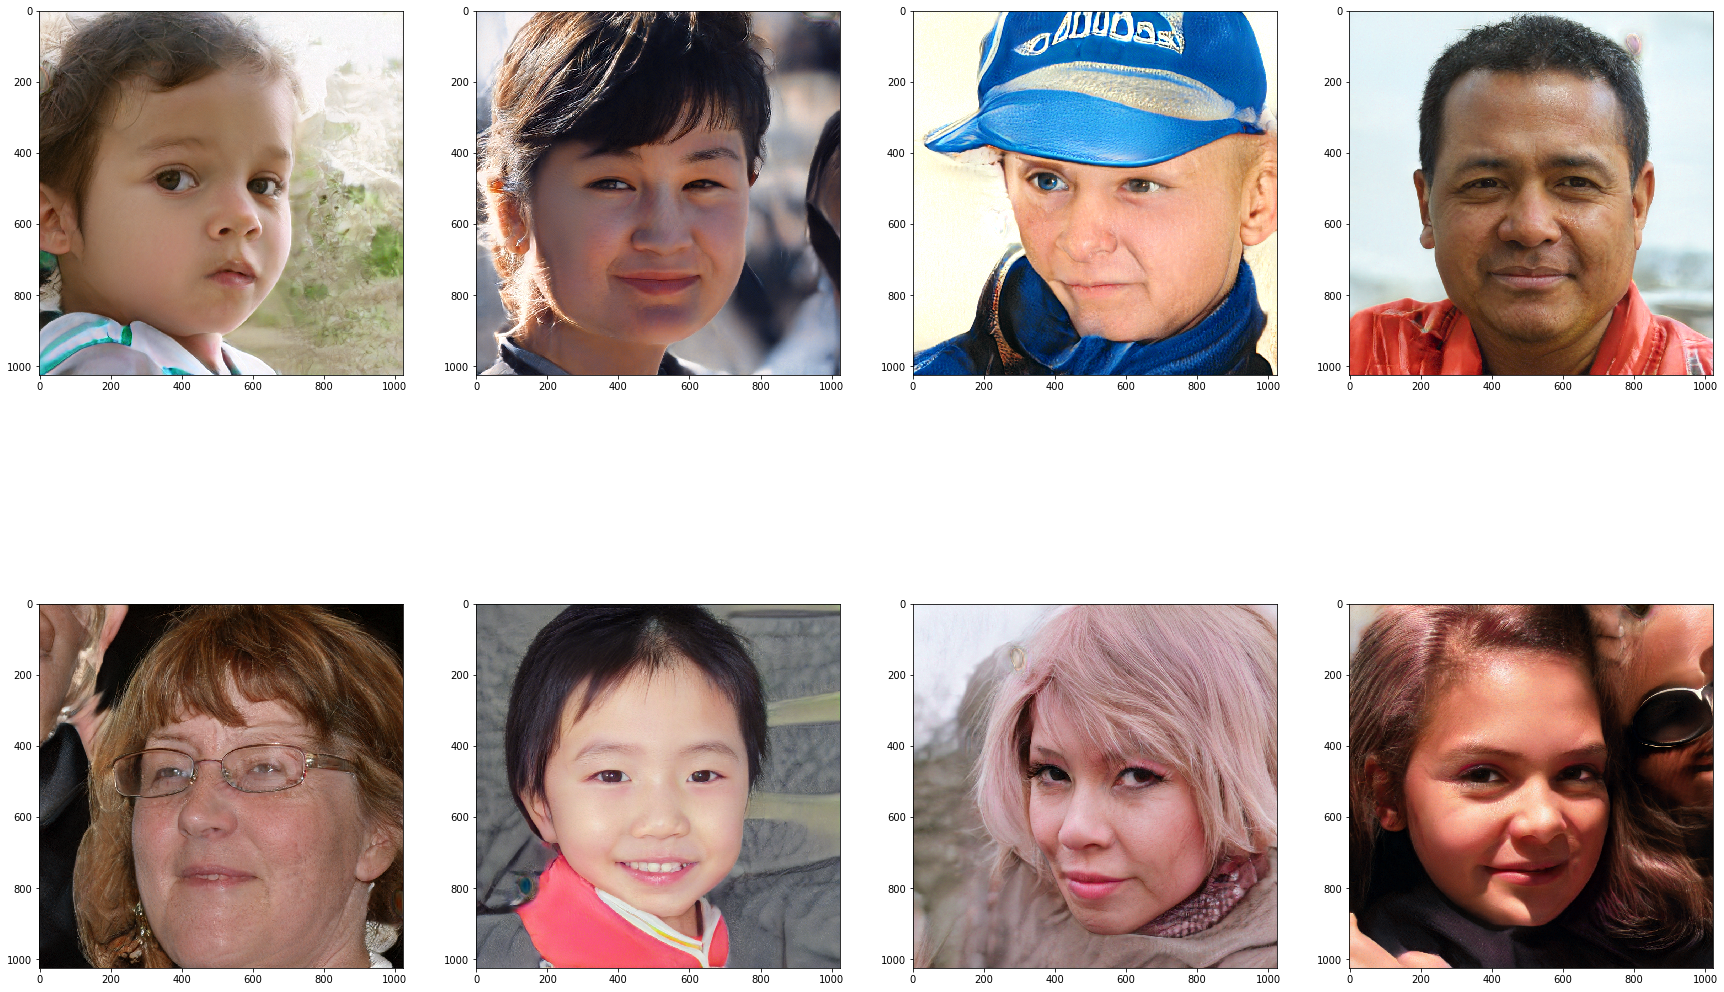

In [16]:
plt.figure(figsize=(30,20))
for batch in valid_generator:
    
    data = batch[0]
#     print(data[0])
    pred = model.predict(data)
    print(pred)
    for i in range(8):
        plt.subplot(2, 4, i+1)
        plt.imshow(data[i])
    break
plt.show()

In [31]:
model.save("vgg19_classifier.h5")

In [14]:
import os
import pickle
import config
import dnnlib
import dnnlib.tflib as tflib
import gzip
import json
import numpy as np
from tqdm import tqdm_notebook
import warnings
import matplotlib.pylab as plt
%matplotlib inline
warnings.filterwarnings("ignore")
import PIL.Image
from encoder.generator_model import Generator

In [15]:
URL_FFHQ = 'https://drive.google.com/uc?id=1MEGjdvVpUsu1jB4zrXZN7Y4kBBOzizDQ'

tflib.init_tf()
with dnnlib.util.open_url(URL_FFHQ, cache_dir=config.cache_dir) as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)

generator = Generator(Gs_network, batch_size=1, randomize_noise=False)

In [16]:
qlatents = np.random.normal(size=(1, 512))
dlatents = Gs_network.components.mapping.run(qlatents, None, minibatch_size=1, randomize_noise=False, structure='fixed')
images = Gs_network.components.synthesis.run(dlatents, minibatch_size=1, randomize_noise=False, output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=True), structure='fixed')

print(images.shape)
img = PIL.Image.fromarray(images[0], 'RGB')
width, height = img.size
print(width, height, images[0])

(1, 1024, 1024, 3)
1024 1024 [[[102 132 150]
  [ 99 124 140]
  [ 90 119 130]
  ...
  [129 179 234]
  [122 168 222]
  [104 148 193]]

 [[107 130 145]
  [107 123 136]
  [102 118 129]
  ...
  [128 185 240]
  [127 180 236]
  [119 169 224]]

 [[106 131 143]
  [112 127 140]
  [113 128 140]
  ...
  [121 184 242]
  [118 174 235]
  [116 167 229]]

 ...

 [[ 23  42  51]
  [ 20  34  46]
  [ 19  32  43]
  ...
  [ 93 110 118]
  [106 128 136]
  [ 94 124 133]]

 [[ 26  42  51]
  [ 22  33  44]
  [ 21  33  41]
  ...
  [ 74  95 103]
  [ 65  88  91]
  [ 72 104 116]]

 [[ 31  48  64]
  [ 21  34  45]
  [ 17  31  41]
  ...
  [ 73  96 103]
  [ 63  84  93]
  [ 65  90 103]]]


In [17]:
import keras 
from keras.models import load_model
from keras.preprocessing.image import array_to_img, img_to_array
from keras.applications.vgg19 import preprocess_input



In [18]:
imgObj = array_to_img(images[0], scale=False).resize((256,256))
inputImg = img_to_array(imgObj)
x = np.asarray([inputImg])
x = x.astype('float32')
x /= 255
# x = preprocess_input(x)
print(x.shape)
print(x)

(1, 256, 256, 3)
[[[[0.44313726 0.5019608  0.54901963]
   [0.36078432 0.43137255 0.45882353]
   [0.3647059  0.41568628 0.43137255]
   ...
   [0.47058824 0.70980394 0.9098039 ]
   [0.47843137 0.7254902  0.9411765 ]
   [0.4627451  0.68235296 0.92156863]]

  [[0.4        0.45882353 0.47843137]
   [0.37254903 0.43529412 0.44313726]
   [0.4        0.45490196 0.46666667]
   ...
   [0.43529412 0.6862745  0.8862745 ]
   [0.46666667 0.69803923 0.92156863]
   [0.39215687 0.6392157  0.8980392 ]]

  [[0.3882353  0.4509804  0.4745098 ]
   [0.37254903 0.43529412 0.45490196]
   [0.38431373 0.45882353 0.4862745 ]
   ...
   [0.45490196 0.70980394 0.90588236]
   [0.44313726 0.68235296 0.91764706]
   [0.41568628 0.65882355 0.92156863]]

  ...

  [[0.08627451 0.20784314 0.2901961 ]
   [0.04313726 0.1254902  0.17254902]
   [0.09803922 0.18431373 0.25490198]
   ...
   [0.3254902  0.36078432 0.3529412 ]
   [0.4117647  0.44705883 0.42745098]
   [0.46666667 0.4862745  0.47843137]]

  [[0.07843138 0.13725491 0.

In [27]:
?preprocess_input

In [19]:
pred = model.predict(x) 
print("%.8f" % pred)
plt.subplot(1, 1, 1)
plt.imshow(imgObj)
plt.show()

FailedPreconditionError: Attempting to use uninitialized value block1_conv1/kernel
	 [[{{node block1_conv1/kernel/read}} = Identity[T=DT_FLOAT, _class=["loc:@block1_conv1/kernel"], _device="/job:localhost/replica:0/task:0/device:GPU:0"](block1_conv1/kernel)]]
	 [[{{node dense_2/Sigmoid/_2101}} = _Recv[client_terminated=false, recv_device="/job:localhost/replica:0/task:0/device:CPU:0", send_device="/job:localhost/replica:0/task:0/device:GPU:0", send_device_incarnation=1, tensor_name="edge_148_dense_2/Sigmoid", tensor_type=DT_FLOAT, _device="/job:localhost/replica:0/task:0/device:CPU:0"]()]]